Initial Simple SIDHARTE V Model in 1 Dimension

Description of the Model
For our project, “Early trend prediction of contagious/infectious diseases”, we plan to use the Stochastic SIDHARTE V Model. The model is named after its six compartments: susceptible (S), infected (I), diagnosed (D), hospitalized (H), asymptomatic (A), recovered (R), treated (T), and deceased (E). The model is represented as a set of differential equations that describe the flow of individuals between these compartments over time.

1. dS/dt = -βS(I+αA) /N
2. dI/dt = βS(I+αA) /N - γI - δI
3. dD/dt = δI - κD
4. dH/dt = κD - φH - μH
5. dA/dt = -βS(I+αA) /N - ωA
6. dR/dt = γI + φH + μH + ωA
7. dT/dt = φH
8. dE/dt = μH

where S is the number of susceptible individuals, I is the number of infected individuals, D is the number of diagnosed individuals, H is the number of hospitalized individuals, A is the number of asymptomatic individuals, R is the number of recovered individuals, T is the number of treated individuals, E is the number of deceased individuals, and N is the total population size. The β parameter represents the transmission rate, which determines the rate at which the disease spreads from infected individuals to susceptible individuals. The α parameter represents the proportion of asymptomatic cases in the population, which can be infectious despite not showing any symptoms. The γ parameter represents the recovery rate, which determines the rate at which infected individuals recover and become immune to the disease. The δ parameter represents the rate at which individuals are diagnosed and moved into the diagnosed compartment. The κ parameter represents the rate at which diagnosed individuals are hospitalized. The φ parameter represents the rate at which hospitalized individuals recover or are treated, while the μ parameter represents the rate at which hospitalized individuals die from the disease. Finally, the ω parameter represents the rate at which asymptomatic individuals recover.

We shall be using the Gillespie algorithm. This algorithm is a stochastic simulation algorithm that can be used to simulate the stochastic behavior of chemical reaction systems. It can be adapted to model the spread of infectious diseases using the SIDHARTE V model, by treating the different compartments as chemical species and simulating the interactions between them.

Based on our problem statement of trend prediction for contagious diseases, a recurrent neural network (RNN) as we are working with time-series data, an RNN will be useful for capturing temporal dependencies and making predictions based on past trends.

Total Rate : 0.0160496 Simulation Time : 1100.358393047398


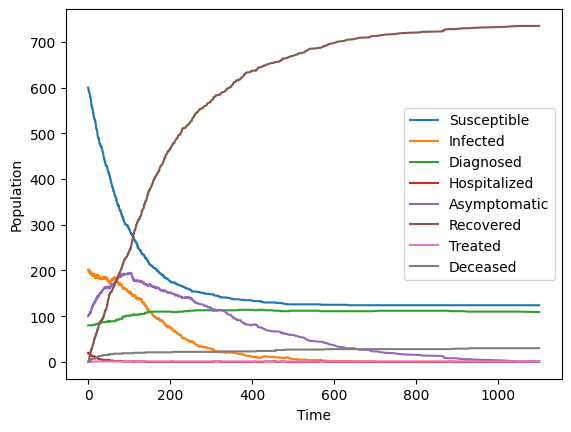

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta = 0.02  # Transmission rate
alpha = 0.01  # Proportion of asymptomatic cases
gamma = 0.01  # Recovery rate
delta = 0.001  # Rate of diagnosis
kappa = 0.0001  # Rate of hospitalization
phi = 0.0015  # Rate of recovery or treatment
mu = 0.05  # Rate of death
omega = 0.005  # Rate of recovery for asymptomatic individuals
population_size = 1000
initial_infected = 10

# Initial conditions
S = 600
I = 200
D = 80
H = 20
A = 100
R = 0
T = 0
E = 0

# Simulation parameters
simulation_time = 1100
time_points = [0]
S_vals = [S]
I_vals = [I]
D_vals = [D]
H_vals = [H]
A_vals = [A]
R_vals = [R]
T_vals = [T]
E_vals = [E]

total_rate = 0.1

# Gillespie algorithm
while time_points[-1] < simulation_time:
    # Calculate rates
    rates = [
        beta * S * (I + alpha * A) / population_size,  # Infection rate
        gamma * I,  # Recovery rate
        delta * I,  # Diagnosis rate
        kappa * D,  # Hospitalization rate
        phi * H,  # Recovery/treatment rate
        mu * H,  # Death rate
        beta * S * (I + alpha * A) / population_size,  # Infection rate for asymptomatic individuals
        omega * A  # Asymptomatic recovery rate
    ]

    # Calculate total rate

    total_rate = sum(rates)
    if total_rate == 0: break

    # Generate two random numbers
    r1, r2 = np.random.rand(2)

    # Calculate time until next event
    dt = -np.log(r1) / total_rate

    # Determine the next event
    probabilities = np.cumsum(rates) / total_rate
    event = np.argmax(probabilities > r2)

    # Update compartments based on the event
    if event == 0:
        S -= 1
        I += 1
    elif event == 1:
        I -= 1
        R += 1
    elif event == 2:
        I -= 1
        D += 1
    elif event == 3:
        D -= 1
        H += 1
    elif event == 4:
        H -= 1
        R += 1
        T += 1
    elif event == 5:
        H -= 1
        E += 1
    elif event == 6:
        S -= 1
        A += 1
    elif event == 7:
        A -= 1
        R += 1

    # Update time and record values
    time_points.append(time_points[-1] + dt)
    S_vals.append(S)
    I_vals.append(I)
    D_vals.append(D)
    H_vals.append(H)
    A_vals.append(A)
    R_vals.append(R)
    T_vals.append(T)
    E_vals.append(E)

print("Total Rate :",total_rate, "Simulation Time :",time_points[-1])

# Plot the results
plt.plot(time_points, S_vals, label='Susceptible')
plt.plot(time_points, I_vals, label='Infected')
plt.plot(time_points, D_vals, label='Diagnosed')
plt.plot(time_points, H_vals, label='Hospitalized')
plt.plot(time_points, A_vals, label='Asymptomatic')
plt.plot(time_points, R_vals, label='Recovered')
plt.plot(time_points, T_vals, label='Treated')
plt.plot(time_points, E_vals, label='Deceased')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()
